<a href="https://colab.research.google.com/gist/gretahartm/049dc2b8014758ae66639521296a2af2/project-sb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tracking Project Simone Biles


Project Name: simonebiles_tracker
Objects to track: Head, knees, feet, hands, shoulders, etc.
Configuration:
Target radius: 4 pixels
Image size: 270x480

**Connection to Google Drive and Google Colab**


*  created a folder named **ssfolder**
*  Runtimesession T4 GPU

**Creating a tracking project**


*   Saved the configuration and dataset in a project directory
*   Loaded the configuration using ***unetTracker.trackingProject.TrackingProject ***from the project directory


*   Edited the config.yaml file in the project directory and reloaded the configuration - Image size: 270x480
*   Ran the notebook once to create the project


*   Skipped the notebook on subsequent runs after the project was already created


#Install unetTracker

In [ ]:
!pip install albumentations==1.3.0
!git clone https://github.com/kevin-allen/unetTracker
!pip install -r unetTracker/requirements.txt
!pip install -e unetTracker

fatal: destination path 'unetTracker' already exists and is not an empty directory.
Obtaining file:///content/unetTracker
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for unetTracker (pyproject.toml) ... done
  Created wheel for unetTracker: filename=unetTracker-0.0.1-0.editable-py3-none-any.whl size=16343 sha256=3136f2e011ccdd33ce269cffee43cbaf500684fdcb26462f0e01a44e8f0353a4
  Stored in directory: /tmp/pip-ephem-wheel-cache-yy76kcb4/wheels/62/9b/5a/0cb547490a9187d698861d98e1e803c5e64f31a9d899a8e84c
Successfully built unetTracker
  Attempting uninstall: unetTracker
    Found existing installation: unetTracker 0.0.1
    Uninstalling unetTracker-0.0.1:
      Successfully uninstalled unetTracker-0.0.1


In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fn = "/content/drive/My Drive/ssfolder"
if os.path.exists(fn):
  print("We can access the dsfolder directory.")
else:
  raise IOError("Problem accessing the ssfolder directory.")

We can access the dsfolder directory.


In [ ]:
from unetTracker.trackingProject import TrackingProject

In [ ]:
root_path = "/content/drive/My Drive/ssfolder/trackingProjects"
if not os.path.exists(root_path):
    print("creating",root_path)
    os.makedirs(root_path)
else:
    print(root_path, "already exists")
    print("If you have already created your project in the past and adjusted the configuration, you don't need to run this notebook again")


/content/drive/My Drive/ssfolder/trackingProjects already exists
If you have already created your project in the past and adjusted the configuration, you don't need to run this notebook again


#Create a TrackingProject object


*   trackingProjects --> simonebiles
*   listed the objects to track --> head, right knee, left knee, right foot, left foot, right hand, left hand, right shoulder, left shoulder, behind



In [ ]:
root_path = "/content/drive/My Drive/ssfolder/trackingProjects"
project = TrackingProject(
    name="simonebiles_tracker",
    root_folder=root_path,
    object_list=["head", "right knee", "left knee", "right foot", "left foot",
                 "right hand", "left hand", "right shoulder", "left shoulder","behind"],
    target_radius=4  # Adjust radius based on object size
)

project.create_project_directories()
project.save_configuration()

Project directory: /content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker


/content/unetTracker/unetTracker/trackingProject.py:78: UserWarning: The directory /content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker already exist.
 If you run save_configuration() you will overwrite the previous configuration.
  warnings.warn("The directory {} already exist.\n If you run save_configuration() you will overwrite the previous configuration.".format(self.project_dir))


Saving /content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker/config.yalm


In [ ]:
print("Project directory:", project.project_dir)
print("Files and subdirectories inside your project directory:",os.listdir(project.project_dir))


Project directory: /content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker
Files and subdirectories inside your project directory: ['dataset', 'models', 'augmentation', 'videos', 'extracted_frames', 'config.yalm']


In [ ]:
project.load_configuration()

Loading /content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker/config.yalm
{'augmentation_HorizontalFlipProb': 0.5, 'augmentation_RandomBrightnessContrastProb': 0.2, 'augmentation_RandomSizedCropProb': 1.0, 'augmentation_RotateProb': 0.3, 'image_extension': '.png', 'image_size': [480, 640], 'labeling_ImageEnlargeFactor': 2.0, 'name': 'simonebiles_tracker', 'normalization_values': None, 'object_colors': [(240.0, 248.0, 255.0), (250.0, 235.0, 215.0), (0.0, 255.0, 255.0), (127.0, 255.0, 212.0), (240.0, 255.0, 255.0), (245.0, 245.0, 220.0), (255.0, 228.0, 196.0), (0.0, 0.0, 0.0), (255.0, 235.0, 205.0), (0.0, 0.0, 255.0)], 'objects': ['head', 'right knee', 'left knee', 'right foot', 'left foot', 'right hand', 'left hand', 'right shoulder', 'left shoulder', 'behind'], 'target_radius': 4, 'unet_features': [64, 128, 256, 512]}


In [ ]:
project.configDict

{'augmentation_HorizontalFlipProb': 0.5,
 'augmentation_RandomBrightnessContrastProb': 0.2,
 'augmentation_RandomSizedCropProb': 1.0,
 'augmentation_RotateProb': 0.3,
 'image_extension': '.png',
 'image_size': [480, 640],
 'labeling_ImageEnlargeFactor': 2.0,
 'name': 'simonebiles_tracker',
 'normalization_values': None,
 'object_colors': [(240.0, 248.0, 255.0),
  (250.0, 235.0, 215.0),
  (0.0, 255.0, 255.0),
  (127.0, 255.0, 212.0),
  (240.0, 255.0, 255.0),
  (245.0, 245.0, 220.0),
  (255.0, 228.0, 196.0),
  (0.0, 0.0, 0.0),
  (255.0, 235.0, 205.0),
  (0.0, 0.0, 255.0)],
 'objects': ['head',
  'right knee',
  'left knee',
  'right foot',
  'left foot',
  'right hand',
  'left hand',
  'right shoulder',
  'left shoulder',
  'behind'],
 'target_radius': 4,
 'unet_features': [64, 128, 256, 512]}

#Creating a TrackingProject object from an existing project config.yalm file

In [ ]:
model_name = "simonebiles_tracker"
root_path = "/content/drive/My Drive/ssfolder/trackingProjects"
project = TrackingProject(name=model_name,root_folder = root_path)

Project directory: /content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker
Getting configuration from config file. Values from config file will be used.
Loading /content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker/config.yalm
{'augmentation_HorizontalFlipProb': 0.5, 'augmentation_RandomBrightnessContrastProb': 0.2, 'augmentation_RandomSizedCropProb': 1.0, 'augmentation_RotateProb': 0.3, 'image_extension': '.png', 'image_size': [270, 480], 'labeling_ImageEnlargeFactor': 2.0, 'name': 'simonebiles_tracker', 'normalization_values': None, 'object_colors': [(240.0, 248.0, 255.0), (250.0, 235.0, 215.0), (0.0, 255.0, 255.0), (127.0, 255.0, 212.0), (240.0, 255.0, 255.0), (245.0, 245.0, 220.0), (255.0, 228.0, 196.0), (0.0, 0.0, 0.0), (255.0, 235.0, 205.0), (0.0, 0.0, 255.0)], 'objects': ['head', 'right knee', 'left knee', 'right foot', 'left foot', 'right hand', 'left hand', 'right shoulder', 'left shoulder', 'behind'], 'target_radius': 4, 'unet_features': [64, 128

In [ ]:
project.configDict

{'augmentation_HorizontalFlipProb': 0.5,
 'augmentation_RandomBrightnessContrastProb': 0.2,
 'augmentation_RandomSizedCropProb': 1.0,
 'augmentation_RotateProb': 0.3,
 'image_extension': '.png',
 'image_size': [270, 480],
 'labeling_ImageEnlargeFactor': 2.0,
 'name': 'simonebiles_tracker',
 'normalization_values': None,
 'object_colors': [(240.0, 248.0, 255.0),
  (250.0, 235.0, 215.0),
  (0.0, 255.0, 255.0),
  (127.0, 255.0, 212.0),
  (240.0, 255.0, 255.0),
  (245.0, 245.0, 220.0),
  (255.0, 228.0, 196.0),
  (0.0, 0.0, 0.0),
  (255.0, 235.0, 205.0),
  (0.0, 0.0, 255.0)],
 'objects': ['head',
  'right knee',
  'left knee',
  'right foot',
  'left foot',
  'right hand',
  'left hand',
  'right shoulder',
  'left shoulder',
  'behind'],
 'target_radius': 4,
 'unet_features': [64, 128, 256, 512]}

#Adjust my setup_project.py file



In [ ]:
# this will run the code in the setup_project.py and create a variable called `project`
%run "/content/drive/My Drive/dsfolder/setup_project.py"

#Notebook 1


*   Extracted images from a video to add them to a dataset
*   Selected images to create a dataset of labeled images
*   160 images and proceeded through all notebooks






In [ ]:
%matplotlib widget

import glob
from unetTracker.dataset import UNetDataset
from unetTracker.camera import USBCamera, bgr8_to_jpeg
from unetTracker.unetGUI import LabelFromImagesGUI

In [ ]:
project.configDict

{'augmentation_HorizontalFlipProb': 0.5,
 'augmentation_RandomBrightnessContrastProb': 0.2,
 'augmentation_RandomSizedCropProb': 1.0,
 'augmentation_RotateProb': 0.3,
 'image_extension': '.png',
 'image_size': [270, 480],
 'labeling_ImageEnlargeFactor': 2.0,
 'name': 'simonebiles_tracker',
 'normalization_values': None,
 'object_colors': [(240.0, 248.0, 255.0),
  (250.0, 235.0, 215.0),
  (0.0, 255.0, 255.0),
  (127.0, 255.0, 212.0),
  (240.0, 255.0, 255.0),
  (245.0, 245.0, 220.0),
  (255.0, 228.0, 196.0),
  (0.0, 0.0, 0.0),
  (255.0, 235.0, 205.0),
  (0.0, 0.0, 255.0)],
 'objects': ['head',
  'right knee',
  'left knee',
  'right foot',
  'left foot',
  'right hand',
  'left hand',
  'right shoulder',
  'left shoulder',
  'behind'],
 'target_radius': 4,
 'unet_features': [64, 128, 256, 512]}

#Create a dataset to store labeled images


In [ ]:
dataset = UNetDataset(image_dir=project.image_dir, mask_dir=project.mask_dir, coordinate_dir=project.coordinate_dir,
                      image_extension=project.image_extension)

In [ ]:
print("Number of images in the dataset:",len(dataset))

Number of images in the dataset: 159


#Extract frames from a video to populate our dataset


*   added my video simonebiles.mp4 to my ssfolder



In [ ]:
video_fn = '/content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker/videos/simonebiles.mp4'


In [ ]:
if os.path.exists(video_fn):
    print("Video file {} exist".format(video_fn))
else:
    raise IOError("Video file {} does not exist".format(video_fn))

Video file /content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker/videos/simonebiles.mp4 exist


In [ ]:
extracted_frame_dir = project.project_dir+"/extracted_frames/" # directory where the extracted images will be saved

In [ ]:
frame_info_file = extracted_frame_dir+"frame_info.csv" # file where the source of the image is stored


In [ ]:
dataset.extract_frames_from_video(video_fn = video_fn,
                                  number_frames = 160, # how many images to extract
                                  frame_dir = extracted_frame_dir,
                                  frame_info_file = frame_info_file,
                                  image_size = project.image_size)

Create /content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker/extracted_frames/
video length: 3327, image size: 270h 480w
Extracting frames: [  12   26   34   63  125  146  178  210  233  266  269  301  316  333
  353  420  472  479  512  515  517  518  523  544  587  613  625  644
  676  684  697  720  721  779  814  825  839  861  887  890  906  960
  972  978  993 1038 1082 1093 1112 1167 1177 1181 1210 1225 1245 1259
 1272 1279 1280 1314 1331 1334 1370 1373 1406 1432 1468 1480 1481 1484
 1500 1515 1516 1557 1572 1578 1583 1605 1625 1682 1721 1726 1763 1765
 1772 1825 1832 1834 1879 1886 1933 1954 1981 1993 2006 2018 2058 2097
 2101 2107 2119 2132 2137 2145 2168 2188 2212 2217 2299 2300 2314 2345
 2372 2406 2410 2411 2423 2429 2430 2437 2474 2480 2548 2563 2594 2601
 2607 2617 2621 2689 2741 2745 2754 2756 2773 2775 2785 2786 2790 2807
 2814 2815 2844 2866 2872 2883 2888 2939 2958 3023 3053 3067 3070 3085
 3095 3102 3141 3155 3179 3246] to /content/drive/My Drive/ssfo

In [ ]:
image_file_list = glob.glob(extracted_frame_dir+"*")
print("Number of files:", len(image_file_list))
image_file_list

Number of files: 161


['/content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker/extracted_frames/frame_info.csv',
 '/content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker/extracted_frames/da58ffa4-cbd4-11ef-9962-0242ac1c000c.png',
 '/content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker/extracted_frames/da614538-cbd4-11ef-9962-0242ac1c000c.png',
 '/content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker/extracted_frames/da67c3ea-cbd4-11ef-9962-0242ac1c000c.png',
 '/content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker/extracted_frames/da70a2a8-cbd4-11ef-9962-0242ac1c000c.png',
 '/content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker/extracted_frames/da80d4a2-cbd4-11ef-9962-0242ac1c000c.png',
 '/content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker/extracted_frames/da93da02-cbd4-11ef-9962-0242ac1c000c.png',
 '/content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker/extracted_frames/daa93316-cbd4

#Label extracted frames and save to dataset



*   used GUI to label the object in the extracted frames





In [ ]:
extracted_frame_dir = project.project_dir+"/extracted_frames/" # directory where the extracted images will be saved
frame_info_file = extracted_frame_dir+"frame_info.csv" # file where the source of the image is stored

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
LabelFromImagesGUI(image_dir=extracted_frame_dir,
                   frame_info_file=frame_info_file,
                   project=project,dataset=dataset)

ValueError: No image found in /content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker/extracted_frames/

In [ ]:
len(dataset)


159

#Data stored in the dataset



*   use the dataset object to retrieved the labeled images



In [ ]:
image, label, coord = dataset[0]

In [ ]:
image.shape

torch.Size([3, 270, 480])

In [ ]:
image.min(),image.max()

(tensor(0.), tensor(241.))

In [ ]:
import matplotlib.pyplot as plt

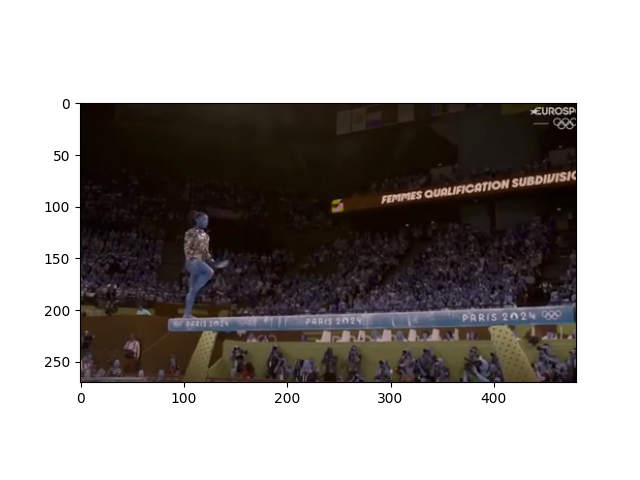

In [ ]:
plt.imshow(image.permute(1,2,0).numpy().astype("int"))
plt.show()

In [ ]:
label.shape,label.dtype

(torch.Size([10, 270, 480]), torch.float32)

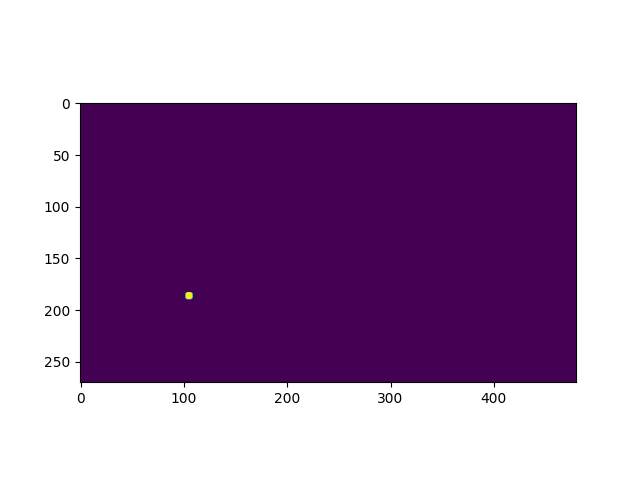

In [ ]:
plt.imshow(label.permute(1,2,0).numpy().astype(int)[:,:,3])
plt.show()

In [ ]:
coord

array([[115., 107.],
       [124., 164.],
       [105., 176.],
       [105., 186.],
       [101., 204.],
       [109., 157.],
       [137., 153.],
       [103., 128.],
       [121., 128.],
       [104., 159.]])

#Notebook 02
##Dataset inspection


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from unetTracker.unetGUI import ReviewDatasetGUI

In [ ]:
dataset = UNetDataset(image_dir=project.image_dir, mask_dir=project.mask_dir, coordinate_dir=project.coordinate_dir, image_extension=project.image_extension)

In [ ]:
len(dataset)


159

In [ ]:
gui = ReviewDatasetGUI(project,dataset)

Output(layout=Layout(border='1px solid black'))